In [1]:
%pwd

'/Users/ryandevera/data-science/tesorio/NCVX-Neural-Structural-Optimization/notebooks'

In [2]:
%cd ..

/Users/ryandevera/data-science/tesorio/NCVX-Neural-Structural-Optimization


In [3]:
%ls

README.md                jobs/                    tasks.py
Untitled.ipynb           models.py                tests/
__init__.py              multi_material_train.py  tf.py
__pycache__/             notebooks/               topo_api.py
buyun_test/              problems.py              topo_physics.py
experiments.py           pygranso_demo.py         train.py
frames/                  raw_data/                utils/
ideas.py                 results/                 utils.py
images/                  structural_opt.png


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from matplotlib import colors

import multi_material_train
import problems
import topo_physics

In [5]:
# Setup problem and device
device = torch.device('cpu')
problem = problems.multi_material_tip_cantilever(
    height=32, width=96, density=0.5, device=device
)
problem.name = 'test-multi-material'
e_materials = torch.tensor([3.0, 2.0, 1.0], dtype=torch.double)
num_materials = len(e_materials)
volfrac = torch.tensor([1.0, 0.7, 0.4], dtype=torch.double)
combined_volfrac = 0.60
aggregation = 'sum'
penal = 2.0
seed = 0

# CNN Multi-Material

In [6]:
# # Run the multi-material problem
# model_type = 'cnn'
# model, ke, args, soln = multi_material_train.train_mass_constrained_multi_material(
#     problem=problem,
#     model_type=model_type,
#     e_materials=e_materials,
#     num_materials=num_materials,
#     volfrac=volfrac,
#     combined_volfrac=combined_volfrac,
#     aggregation=aggregation,
#     penal=penal,
#     seed=seed,
# )

In [7]:
# # Evaluate the outputs
# model.eval()
# with torch.no_grad():
#     final_compliance, final_design = topo_physics.calculate_multi_material_compliance(
#         model, ke, args, device=device, dtype=torch.double
#     )
#     final_design = final_design.detach().cpu().numpy()

In [8]:
# # Plot the outputs
# # fillColors = ["black", "red", "cyan", "0.90"]
# fillColors = ["0.90", "cyan", "black", "red"]

# fig, ax = plt.subplots(1, 1, figsize=(10, 7))
# ax.imshow(
#     np.argmax(final_design, axis=0),
#     cmap=colors.ListedColormap(fillColors),
#     vmin=0,
#     vmax=3
# )

In [9]:
# # Let's check the ratio of the materials
# outputs = model(None)
# softmax = nn.Softmax()
# outputs = softmax(outputs)

# x0 = outputs[0, :, :].mean()
# x1 = volfrac[0] * outputs[1, :, :].mean()
# x2 = volfrac[0] * outputs[2, :, :].mean()
# x3 = volfrac[0] * outputs[3, :, :].mean()

# (x0, x1, x2, x3)

# MLP Multi-Material

In [10]:
# Run the multi-material problem
model_type = 'mlp'
model, ke, args, soln = multi_material_train.train_mass_constrained_multi_material(
    problem=problem,
    model_type=model_type,
    e_materials=e_materials,
    num_materials=num_materials,
    volfrac=volfrac,
    combined_volfrac=combined_volfrac,
    aggregation=aggregation,
    penal=penal,
    seed=seed,
)

/Users/ryandevera/.virtualenvs/ncvx/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]




╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
═════════════════════════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                                             ║ 
Version 1.2.0                                                                                                    ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang                                  ║ 
═════════════════════════════════════════════

/Users/ryandevera/.virtualenvs/ncvx/lib/python3.9/site-packages/pygranso/private/bfgsHessianInverseLimitedMem.py:237: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)
  alpha[j,:]  = self.rho[0,j] * (self.S[:,j].T  @ q)


   2 ║ 1.000000 │  0.70427448245 ║  0.43114664403 ║   -  │ 0.273128 ║ S  │     2 │ 2.000000 ║     1 │ 0.019770   ║ 
   3 ║ 1.000000 │  0.47674033546 ║  0.41135177084 ║   -  │ 0.065389 ║ S  │     2 │ 2.000000 ║     1 │ 0.011306   ║ 
   4 ║ 1.000000 │  0.38761893845 ║  0.38496959244 ║   -  │ 0.002649 ║ S  │     1 │ 1.000000 ║     1 │ 0.026481   ║ 
   5 ║ 1.000000 │  0.38027056711 ║  0.36842464597 ║   -  │ 0.011846 ║ S  │     2 │ 0.500000 ║     1 │ 0.009523   ║ 
   6 ║ 1.000000 │  0.35176622960 ║  0.34854827937 ║   -  │ 0.003218 ║ S  │     1 │ 1.000000 ║     1 │ 0.021018   ║ 
   7 ║ 1.000000 │  0.33428544407 ║  0.32890210546 ║   -  │ 0.005383 ║ S  │     1 │ 1.000000 ║     1 │ 0.010691   ║ 
   8 ║ 1.000000 │  0.32181060345 ║  0.31543312754 ║   -  │ 0.006377 ║ S  │     1 │ 1.000000 ║     1 │ 0.011068   ║ 
   9 ║ 1.000000 │  0.30224967640 ║  0.29711843740 ║   -  │ 0.005131 ║ S  │     2 │ 2.000000 ║     1 │ 0.013001   ║ 
  10 ║ 1.000000 │  0.28947901903 ║  0.28890719457 ║   -  │ 5.72e-04 ║ S 

AssertionError: 

In [ ]:
%debug

In [ ]:
model.xy

In [ ]:
# Evaluate the outputs
final_compliance, final_design = topo_physics.calculate_multi_material_compliance(
    model, ke, args, device=device, dtype=torch.double
)
final_design = final_design.detach().cpu().numpy()

In [ ]:
# Plot the outputs
fillColors = ["0.90", "red", "cyan", "black"]

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.imshow(
    np.argmax(final_design, axis=0),
    cmap=colors.ListedColormap(fillColors),
    vmin=0,
    vmax=3
)

In [ ]:
# Let's check the ratio of the materials
outputs = model(None)

x0 = outputs[0, :, :].mean()
x1 = volfrac[0] * outputs[1, :, :].mean()
x2 = volfrac[0] * outputs[2, :, :].mean()
x3 = volfrac[0] * outputs[3, :, :].mean()

(x0, x1, x2, x3)

In [ ]:
outputs.sum(axis=0)

# Adam Tests

In [18]:
# stdlib
import gc
import random
import time
from os import path

# third party
import cvxopt
import cvxopt.cholmod
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import colors
from pygranso.private.getNvar import getNvarTorch
from pygranso.pygranso import pygranso
from pygranso.pygransoStruct import pygransoStruct
from scipy.sparse import coo_matrix

# first party
import models
import topo_api
import topo_physics
import utils

In [19]:
# Setup problem and device
device = torch.device('cpu')
problem = problems.multi_material_tip_cantilever(
    height=32, width=96, density=0.5, device=device
)
problem.name = 'test-multi-material'
e_materials = torch.tensor([3.0, 2.0, 1.0], dtype=torch.double)
num_materials = len(e_materials)
volfrac = torch.tensor([1.0, 0.7, 0.4], dtype=torch.double)
combined_volfrac = 0.60
aggregation = 'mean'
penal = 3.0
seed = 5
model_type = 'mlp'

# Set up seed for reproducibility
np.random.seed(seed)
torch.random.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# For now setup the device to be CPU
device = torch.device("cpu")
dtype = torch.double

# Get the args
args = topo_api.specified_task(problem, device=device)

# TODO: Once we get this example working we can configure the problem in the right
# way but for now we will set it from the inputs to the function
args = topo_api.specified_task(problem, device=device)
args["e_materials"] = e_materials
args["num_materials"] = num_materials
args["volfrac"] = volfrac
args["combined_volfrac"] = combined_volfrac
args["aggregation"] = aggregation
args["penal"] = penal

# Get the stiffness matrix
ke = topo_physics.get_stiffness_matrix_multi_material(
    device=device,
).to(dtype=torch.double)

# Keyword arguments for the different types of models we will
# allow. Currently, we have the DIP multi-material and the MLP
# multi-material for comparison
numLayers = 5  # noqa
numNeuronsPerLyr = 20  # noqa
cnn_kwargs = dict(resizes=(1, 2, 2, 2, 1))

# Select the model
if model_type == "cnn":
    model = models.MultiMaterialModel(args, **cnn_kwargs).to(
        device=device, dtype=torch.double
    )

elif model_type == "mlp":
    model = models.TopNetPyGranso(
        numLayers,
        numNeuronsPerLyr,
        args["nelx"],
        args["nely"],
        args["num_materials"],
        symXAxis=False,
        symYAxis=False,
        reshape=True,
        optimizer='pygranso',
        seed=seed,
    ).to(device=device, dtype=torch.double)

else:
    raise ValueError("There is no such model!")

# Calculate the inital compliance
initial_compliance, x_phys = topo_physics.calculate_multi_material_compliance(
    model, ke, args, device, torch.double
)
initial_compliance = torch.ceil(initial_compliance.to(torch.float64).detach()) + 1.0

# If we can get the initial compliance then we can also get the intial
# mass constraint
initial_mass_constraint = utils.compute_mass_constraint(x_phys, args)
initial_mass_constraint = initial_mass_constraint.detach()
print(initial_mass_constraint)

# Put the model in training mode
model.train()

tensor(-0.2142)


TopNetPyGranso(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=20, bias=True)
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): Linear(in_features=20, out_features=4, bias=True)
  )
  (bnLayer): ModuleList(
    (0): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

In [20]:
# Set up an optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
alpha = 100

for epoch in range(200):
    print(f'Epoch = {epoch}')
    optimizer.zero_grad()
    
    # compute objective
    unscaled_compliance, full_x_phys = topo_physics.calculate_multi_material_compliance(
        model, ke, args, device, dtype
    )
    objective = 1.0 / initial_compliance * unscaled_compliance
    
    # Compute the mass constraint
    mass_constraint_value = utils.compute_mass_constraint(full_x_phys, args)
    c1 = torch.abs(mass_constraint_value / initial_mass_constraint)  # noqa
    
    # loss
    loss = objective + alpha * c1
    loss.backward()
    
    print(f'Objective = {objective}')
    print(f'constraint = {c1}')
    print(f'loss = {loss}')
    
    # Apply gradients
    optimizer.step()
    
    # update alpha
    alpha = min(100, alpha + 0.15)

Epoch = 0
Objective = 0.9989159278138663
constraint = 1.0
loss = 100.99891592781387
Epoch = 1
Objective = 0.994166944256643
constraint = 0.9948638677597046
loss = 100.4805561044129
Epoch = 2
Objective = 0.9896702070761343
constraint = 0.9897727966308594
loss = 99.96694987016207
Epoch = 3
Objective = 0.9855038146143882
constraint = 0.9847354292869568
loss = 99.45904507438001
Epoch = 4
Objective = 0.9816610310506916
constraint = 0.9797300696372986
loss = 98.95466823319913
Epoch = 5
Objective = 0.9780808755890417
constraint = 0.9747689366340637
loss = 98.45497143955389
Epoch = 6
Objective = 0.9747892109217832
constraint = 0.9698851108551025
loss = 97.96329934275772
Epoch = 7
Objective = 0.9717184440367226
constraint = 0.9650269746780396
loss = 97.47441924970079
Epoch = 8
Objective = 0.968779894846988
constraint = 0.96019047498703
loss = 96.98783049299152
Epoch = 9
Objective = 0.9659897678990973
constraint = 0.9553896188735962
loss = 96.5049530857702
Epoch = 10
Objective = 0.96330303772020

In [21]:
# Evaluate the outputs
final_compliance, final_design = topo_physics.calculate_multi_material_compliance(
    model, ke, args, device=device, dtype=torch.double
)
final_design = final_design.detach().cpu().numpy()

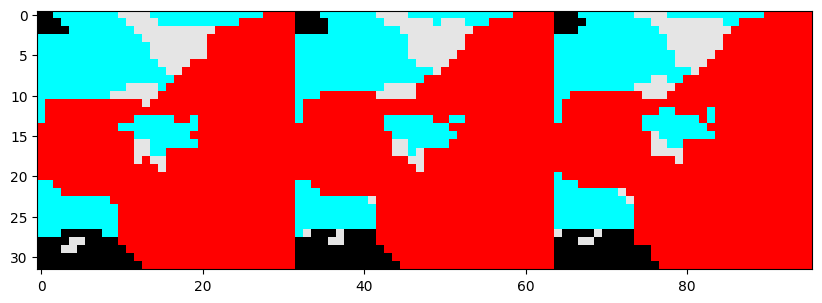

In [22]:
# Plot the outputs
fillColors = ["0.90", "red", "cyan", "black"]

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.imshow(
    np.argmax(final_design, axis=0),
    cmap=colors.ListedColormap(fillColors),
    vmin=0,
    vmax=3
)